# <center>Decision Tree Tutorial Using The Iris Data Set</center>

References: 
* http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
* http://scikit-learn.org/stable/modules/tree.html
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf

In [1]:
%matplotlib inline

In [2]:
# Import packages 
from IPython.display import Image
import holoviews as hv
from itertools import combinations
import graphviz
from pyqtgraph import LegendItem
import matplotlib.pyplot as plt
import numpy as np
import pydotplus 
from sklearn import tree
from sklearn.datasets import load_iris

In [3]:
# Load iris data
iris = load_iris()
trainingData = iris.data
trainingLabels = iris.target

# Shuffle data
shuffler = np.arange(len(trainingData))
np.random.shuffle(shuffler)
trainingData = [trainingData[i] for i in shuffler]
trainingLabels = [trainingLabels[i] for i in shuffler]

# Split into training and test data
split = len(trainingData)/10
testData = trainingData[:split]
trainingData = trainingData[split:]
testLabels = trainingLabels[:split]
trainingLabels = trainingLabels[split:]

### Start by viewing 2D cross-sections of the data: 

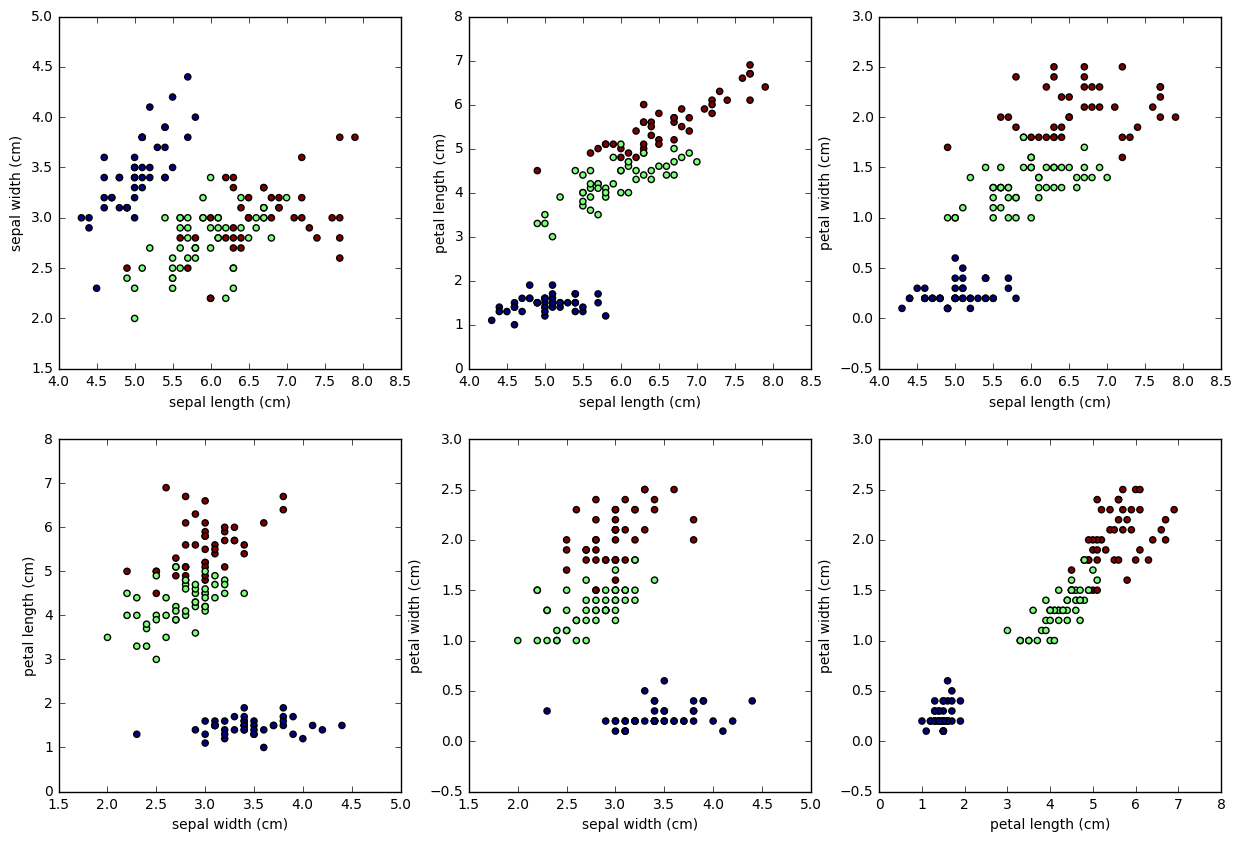

In [4]:
# Plot the training data for every pair of features in the data set (color coded by its corresponding label)
plt.figure(figsize = (15,10))
plotNumber = 0

featurePairs = combinations(range(4), 2)
for featurePair in featurePairs:
    plotNumber += 1
    plt.subplot(2,3,plotNumber)
    
    plt.scatter([i[featurePair[0]] for i in trainingData], [i[featurePair[1]] for i in trainingData], c=trainingLabels)
    plt.xlabel(iris.feature_names[featurePair[0]])
    plt.ylabel(iris.feature_names[featurePair[1]])

### Next, train decision trees on each of these cross sections to visualize the process in lower dimensions:

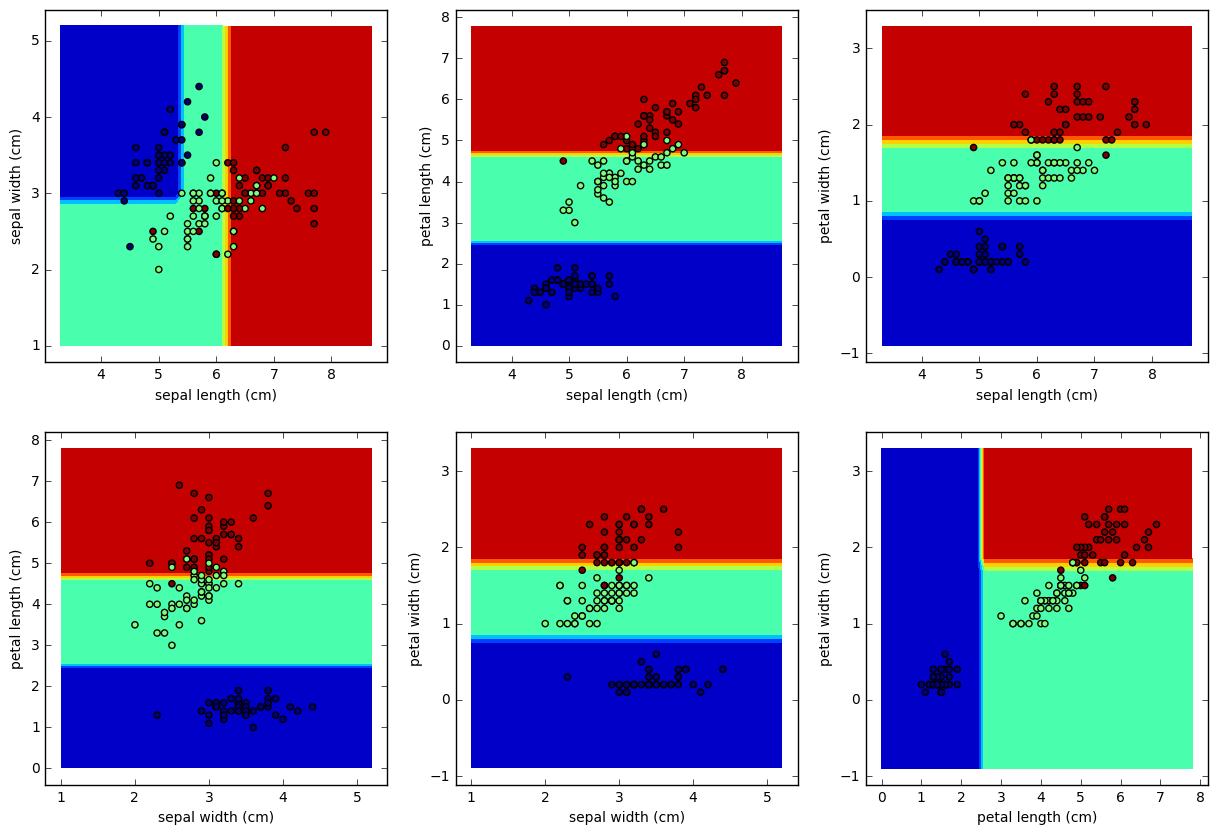

In [5]:
# Specify depth of decision tree
tree_depth = 2

# Plot decision surfaces for trees trained to the specified depth on pairs of features
plt.figure(figsize = (15,10))
plotNumber = 0

featurePairs = combinations(range(4), 2)
for featurePair in featurePairs:
    plotNumber += 1
    plt.subplot(2,3, plotNumber)

    # Train the model on only these two features
    X = [ [i[featurePair[0]],i[featurePair[1]] ] for i in trainingData]
    y = trainingLabels
    model = tree.DecisionTreeClassifier(max_depth = tree_depth)
    model.fit(X, y)

    # Determine the limits of the plot
    x_min = min([i[featurePair[0]] for i in trainingData]) - 1
    x_max = max([i[featurePair[0]] for i in trainingData]) + 1
    y_min = min([i[featurePair[1]] for i in trainingData]) - 1
    y_max = max([i[featurePair[1]] for i in trainingData]) + 1
        
    # Create a mesh grid based on the plot limits, then classify the mesh using the trained model
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the mesh predictions
    cs = plt.contourf(xx, yy, Z, color = None)

    # Plot the training points on top of the mesh
    plt.scatter([i[featurePair[0]] for i in trainingData], [i[featurePair[1]] for i in trainingData], c=trainingLabels)
    plt.xlabel(iris.feature_names[featurePair[0]])
    plt.ylabel(iris.feature_names[featurePair[1]])
    
    # Label the axes
    plt.xlabel(iris.feature_names[featurePair[0]])
    plt.ylabel(iris.feature_names[featurePair[1]])

### Finally, train a decision tree using all 4 feature dimensions, then have a look at the tree:

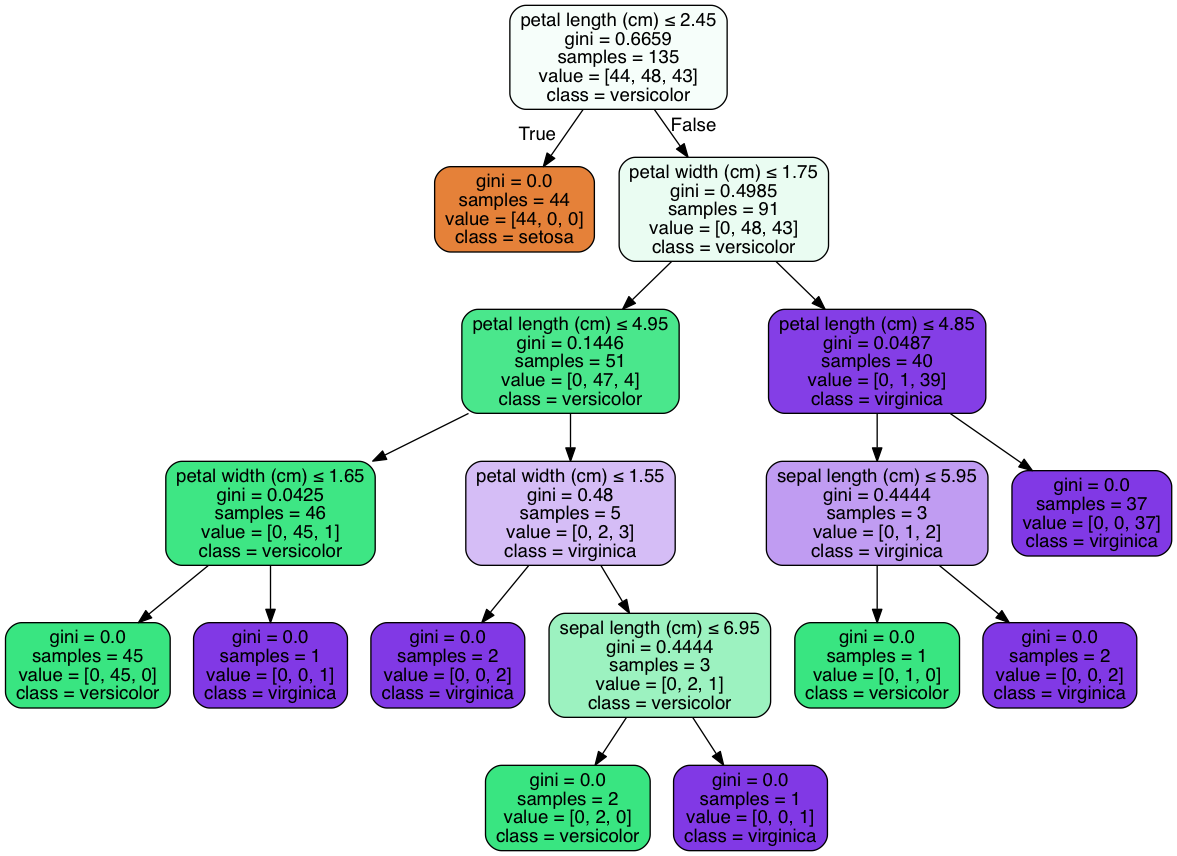

In [6]:
# Specify depth of decision tree
tree_depth = 5
    
# Train the model
model = tree.DecisionTreeClassifier(max_depth = tree_depth)
model.fit(trainingData, trainingLabels)

# Create tree visualization in dot format (via GraphViz)
dot_data = tree.export_graphviz(model, 
                     out_file = None,
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())   